In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

visa_df=pd.read_csv('Visadataset.csv')
cat_cols=visa_df.select_dtypes(include='object').columns
num_cols=visa_df.select_dtypes(exclude='object').columns
num_cols

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x1ea1c07db10>,
 'caps': [<matplotlib.lines.Line2D at 0x1ea1c07f610>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ea1c07d0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ea1bb8cf50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ea1bb8d9d0>],
 'means': []}

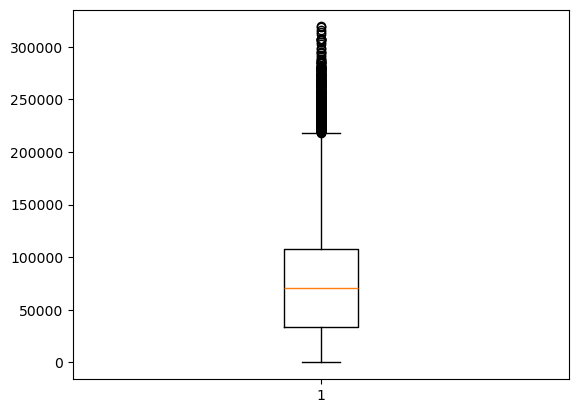

In [2]:
p_wage=visa_df['prevailing_wage']
plt.boxplot(p_wage)
# black dots are called fliers

{'whiskers': [<matplotlib.lines.Line2D at 0x21718326f90>,
 'caps': [<matplotlib.lines.Line2D at 0x2171841c790>,
 'boxes': [<matplotlib.lines.Line2D at 0x217175c5950>],
 'medians': [<matplotlib.lines.Line2D at 0x2171841e990>],
 'fliers': [<matplotlib.lines.Line2D at 0x2171841ee10>],
 'means': []}

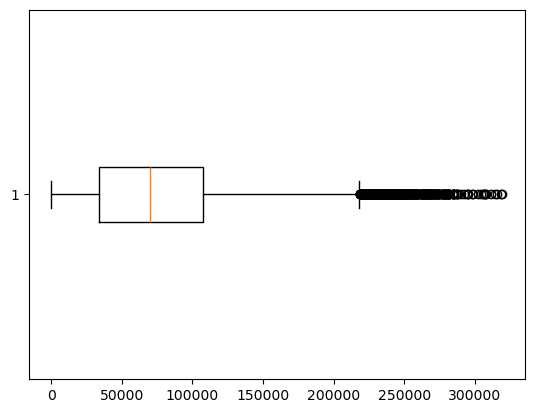

In [6]:
p_wage=visa_df['prevailing_wage']
plt.boxplot(p_wage,vert=False)

Text(0.5, 1.0, 'Boxplot')

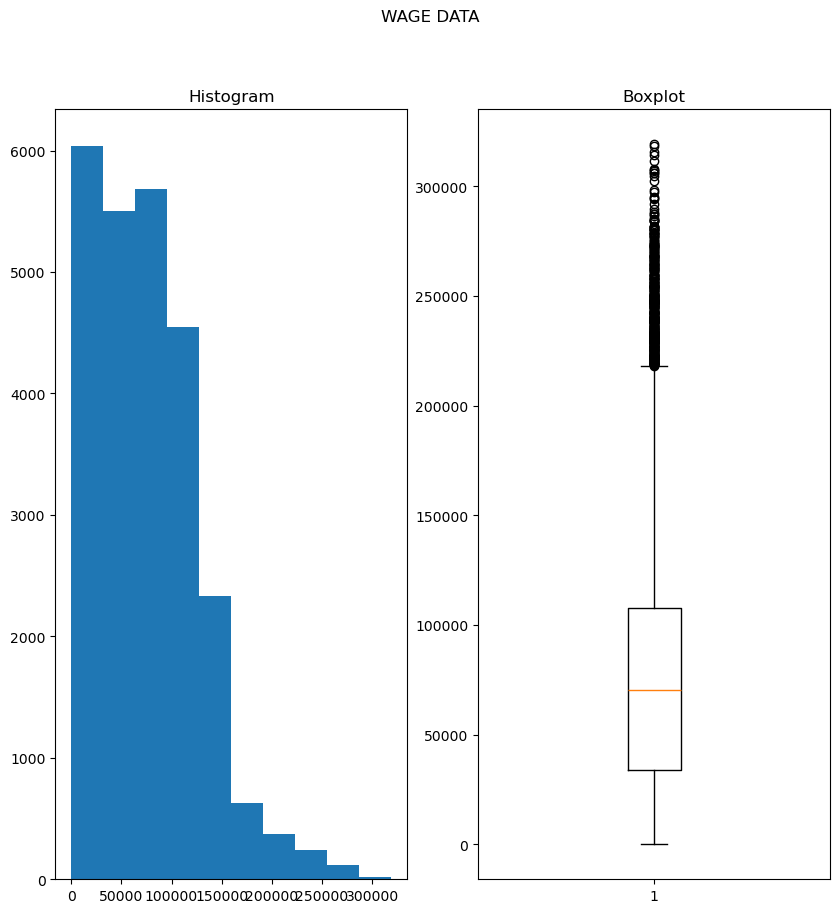

In [3]:
plt.figure(figsize=(10,10))
plt.suptitle('WAGE DATA')
#################################
plt.subplot(1,2,1)
plt.hist(p_wage)
plt.title('Histogram')
##################################
plt.subplot(1,2,2)
plt.boxplot(p_wage)
plt.title('Boxplot')


Text(0.5, 1.0, 'Boxplot')

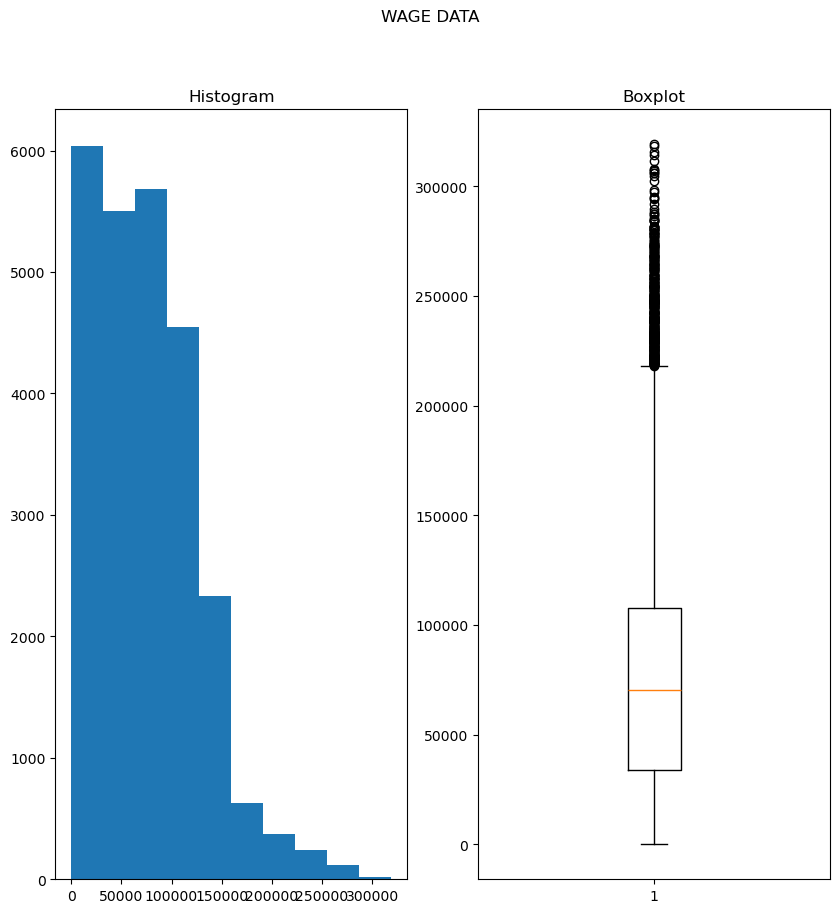

In [14]:
plt.figure(figsize=(10,10))
plt.suptitle('WAGE DATA')
#################################
plt.subplot(1,2,1).hist(p_wage)
plt.title('Histogram')
##################################
plt.subplot(1,2,2).boxplot(p_wage)
plt.title('Boxplot')

**How to find the outliers**

In [10]:
#1 Q1
#2 q2
#3 Q3
#4 IQR=Q3-Q1
#5 lb=Q1-1.5*IQR
#6 ub=Q3+1.5*IQR
#7 con1=wage_data<lb
#8 con2=wage_data<ub
#9 con3=con1 |con2
#10 outliers_data=visa_df[con3]

wage_data=visa_df['prevailing_wage']
q1=wage_data.quantile(0.25)
q3=wage_data.quantile(0.75)
iqr=q3-q1
lb=q1-(1.5*iqr)
ub=q3+(1.5*iqr)
cond1=wage_data<lb
cond2=wage_data>ub
cond3=cond2 | cond2
non_outliers_df=visa_df[cond3]

**SEP 6 class**

In [11]:
#Non-outliers data

wage_data=visa_df['prevailing_wage']
q1=wage_data.quantile(0.25)
q3=wage_data.quantile(0.75)
iqr=q3-q1
lb=q1-(1.5*iqr)
ub=q3+(1.5*iqr)
cond1=wage_data>lb
cond2=wage_data<ub
cond3=cond2 & cond2
outliers_df=visa_df[cond3]
len(visa_df),len(outliers_df),len(non_outliers_df)

(25480, 25053, 427)

In [12]:
len(visa_df)== len(outliers_df)+len(non_outliers_df)

True

**HOW TO REPLACE THE OUTLIERS**

- drop the outliers

- fill the outliers

    - using median
    - cap method: fill with Q1 or Q3
 
- isolation forest ML algorithm to detect anamolies (unwanted observations)

In [14]:
l=[]
for i in visa_df['prevailing_wage']:
    print(i,end=' ')


592.2029 83425.65 122996.86 83434.03 149907.39 78252.14 53635.39 418.2298 74362.19 67514.76 83588.56 70813.09 28663.05 107196.03 220081.73 74108.02 3706.79 16132.61 150441.13 79948.12 71128.98 137694.98 45642.39 90108.38 71286.04 99489.65 86332.95 103029.33 40925.86 189190.48 79594.12 135866.13 72077.57 81921.18 225569.73 92421.92 2490.12 110817.26 50960.01 125336.9 39633.32 156326.33 43630.58 54614.42 28989.87 22924.91 61567.75 156251.17 86022.02 49565.37 66191.41 95623.2 115014.05 35018.04 230.8072 113799.64 85854.09 14174.04 47176.84 4949.28 67410.59 58791.58 103.2216 62591.57 102919.59 123468.56 82324.64 5319.49 153019.94 38059.89 230.327 61521.92 121316.5 122540.55 47170.76 330.3743 2927.34 107781.48 590.0203 194176.83 102073.81 113882.38 70778.82 84125.48 174014.59 34213.17 79813.05 113327.34 78893.64 140290.16 111926.01 125880.21 527.8901 49357.95 69335.2 99737.18 91449.62 34494.86 395.995 159645.51 28243.79 43421.88 80253.78 115235.95 95200.86 41613.52 64137.41 66295.43 97520.0

In [24]:
visa_df=pd.read_csv('Visadataset.csv')
l=[]
wage_data=visa_df['prevailing_wage']
q1=wage_data.quantile(0.25)
q3=wage_data.quantile(0.75)
iqr=q3-q1
lb=q1-(1.5*iqr)
ub=q3+(1.5*iqr)
wage_med=np.median(wage_data)
for i in wage_data:
    if i<lb or i>ub:
        l.append(wage_med)
    else:
        l.append(i)
visa_df['prevailing_wage']=l #overwriting wage data with new data

TypeError: object of type 'int' has no len()

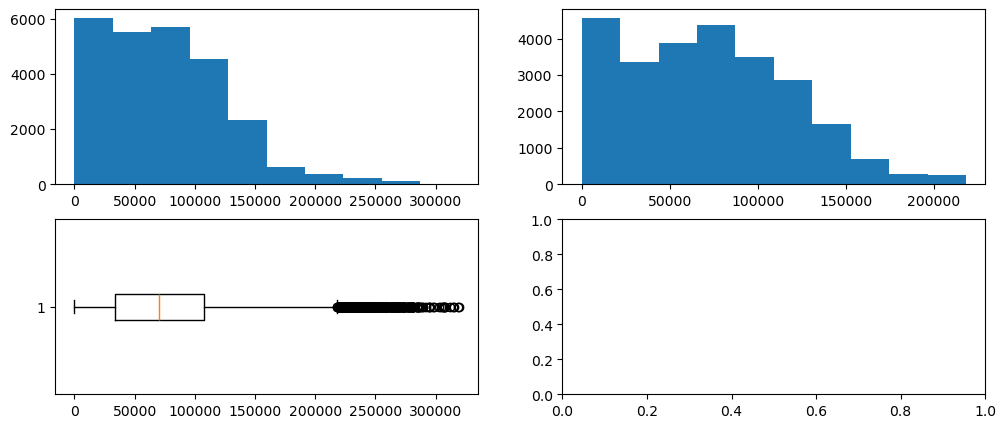

In [25]:
plt.figure(figsize=(12,5))
plt.subplot(2,2,1).hist(wage_data)
plt.subplot(2,2,2).hist(l)
plt.subplot(2,2,3).boxplot(wage_data,vert=False)
plt.subplot(2,2,4).boxplot(1,vert=False)
plt.show()


**np.where**

In [26]:
d={'Num':[1,2,3],
   'City':['Hyd','Blr','Pune']}
df=pd.DataFrame(d)
df

,Num,City
0,1,Hyd
1,2,Blr
2,3,Pune


In [27]:
# num which is greater than 2 = 200
l=[]
for i in df['Num']:
    if i>2:
        l.append(200)
    else:
        l.append(i)
df['Num']=l

In [28]:
l

[1, 2, 200]

In [30]:
con=df['Num']>2
true=300
false=df['Num']
l=np.where(con,true,false)
df['Num2']=l
df


,Num,City,Num2
0,1,Hyd,1
1,2,Blr,2
2,200,Pune,300


In [32]:
# using np.where in same outliers removal code

visa_df=pd.read_csv('Visadataset.csv')
l=[]
wage_data=visa_df['prevailing_wage']
q1=wage_data.quantile(0.25)
q3=wage_data.quantile(0.75)
iqr=q3-q1
lb=q1-(1.5*iqr)
ub=q3+(1.5*iqr)
wage_med=np.median(wage_data)
#for i in wage_data:
#    if i<lb or i>ub:
#        l.append(wage_med)
#    else:
#        l.append(i)

con=(wage_data<lb) | (wage_data>ub)
true=wage_med
false=wage_data
l=np.where(con,true,false)
visa_df['prevailing_wage']=l #overwriting wage data with new data

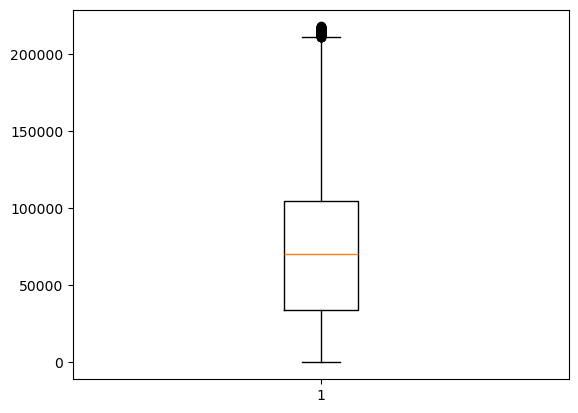

In [34]:
plt.boxplot(visa_df['prevailing_wage'])
plt.show()